In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./datasets/복합기 크롤링 중복제거.xlsx")

In [3]:
cols = ['Unnamed: ' + str(i) for i in range(3,30)]
data = data.drop(cols, axis=1)
cols2=['스펙 목록', '가격']
data = data.drop(cols2, axis=1)

In [4]:
data['productid'] = [i for i in range(0,5901)]

In [5]:
test={'user':['user' + str(np.random.randint(0,30)) for i in range(1,5902)],
     'rating':[np.random.randint(0,2) for i in range(1,5902)],
     'productid':[np.random.randint(0,5902) for i in range(1,5902)]}
test = pd.DataFrame(test)
print(test)

        user  rating  productid
0      user9       0       1205
1     user10       1       2634
2     user15       1       2416
3      user4       0        359
4      user7       1       2057
...      ...     ...        ...
5896   user2       1        490
5897  user22       0         72
5898  user16       1        139
5899  user29       0       4018
5900  user13       0       3651

[5901 rows x 3 columns]


In [6]:
merge_data = pd.merge(test, data, on = 'productid')

In [7]:
merge_data

,user,rating,productid,상품명
0,user9,0,1205,Canon PIXMA MP198
1,user20,1,1205,Canon PIXMA MP198
2,user10,1,2634,HP 데스크젯 F2410
3,user15,0,2634,HP 데스크젯 F2410
4,user15,1,2416,Epson 완성형 정품 무한 L6191
...,...,...,...,...
5896,user0,1,3029,HP 오피스젯 6962 병행수입
5897,user17,1,502,Canon IR C3125
5898,user15,0,5184,삼성전자 SL-M2670N
5899,user19,1,1643,Canon PIXMA 정품 무한 G6090


In [23]:
rating = merge_data.pivot_table('rating', index='user', columns='상품명').fillna(0)
rating.head()

상품명,ApeosPort 3560,ApeosPort C2060,ApeosPort C3060,ApeosPort-II C3000,ApeosPort-IV C2270CPS,ApeosPort-IV C4470 CPSF,ApeosPort-IV C5570,ApeosPort-IV C5570 CP,ApeosPort-IV C5570 CPS,ApeosPort-IV C5570 CPSF,...,코니카미놀타 C022DN,코니카미놀타 C028DN,코니카미놀타 MagiColor 4690MF,코니카미놀타 bizhub 164,코니카미놀타 bizhub 215,코니카미놀타 bizhub 283,코니카미놀타 bizhub 362,코니카미놀타 bizhub 363,코니카미놀타 bizhub C360,코니카미놀타 bizhub C451
user,,,,,,,,,,,,,,,,,,,,,
user0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
user11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
product_rating=rating.values.T
product_rating.shape

(1293, 30)

In [25]:
SVD = TruncatedSVD(n_components=12)
matrix=SVD.fit_transform(product_rating)
matrix.shape

(1293, 12)

In [26]:
matrix[0]

array([ 3.05496439e-18,  4.39440571e-15, -2.59669805e-15, -5.15185053e-15,
       -1.36349686e-15,  4.59422837e-15,  1.29886301e-14, -1.13359711e-14,
       -8.05060896e-15,  1.32477393e-15, -4.32321561e-15,  5.21186241e-15])

In [27]:
corr=np.corrcoef(matrix)

<AxesSubplot:>

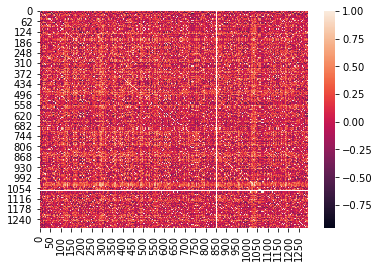

In [19]:
sns.heatmap(corr)

In [28]:
product=rating.columns
product_list=list(product)
coffey_hands=product_list.index('ApeosPort 3560')

In [33]:
corr_coffey_hands = corr[coffey_hands]
list(product[(corr_coffey_hands >= 0.6)])[:50]

['ApeosPort 3560',
 'Apeosport-IV C5575 CP',
 'Canon DSLR Printer MG5270 무한공급기',
 'Canon IR ADV 4525',
 'Canon MAXIFY MB2750 무한공급기',
 'Canon PIXMA MX397',
 'Canon PIXMA MX897',
 'Canon PIXMA MX922 병행수입',
 'Canon R772KG',
 'Epson WorkForce WF-2531 무한공급기',
 'Epson 완성형 정품 무한 L3101',
 'HP 레이저젯 엔터프라이즈 MFP M632h',
 'HP 오피스젯 엔터프라이즈 X585dn 다기능 프린터',
 'HP 오피스젯 프로 8710',
 'Kyocera FS-C2026MFP',
 'Kyocera FS-C8025MFP',
 'Kyocera M8124cidn',
 'LG전자 LIP2250C',
 '삼성전자 MultiXpress SL-K7600GX',
 '삼성전자 SL-J3570FW',
 '삼성전자 SL-P7600LX',
 '아이블럭 오피스젯 프로 8660 e-복합기 무한공급기',
 '코니카미놀타 C022DN']

In [44]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.user == 'user'+ str(user_id)]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'productid').sort_values(['rating'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['productid'].isin(user_history['productid'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'productid')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      

    return user_history, recommendations

In [45]:
already_rated, predictions = recommend_movies(rating, 3, data, test, 10)

KeyError: 'productid'